In [14]:
from kan import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,1,1], grid=3, k=3, seed=2, device=device)
f = lambda x: torch.exp(torch.special.bessel_j0(20*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)

# train the model
model.fit(dataset, opt="LBFGS", steps=20);

cpu
checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

| train_loss: 5.15e-01 | test_loss: 5.86e-01 | reg: 5.84e+00 | : 100%|█| 20/20 [00:06<00:00,  3.10it

saving model version 0.1


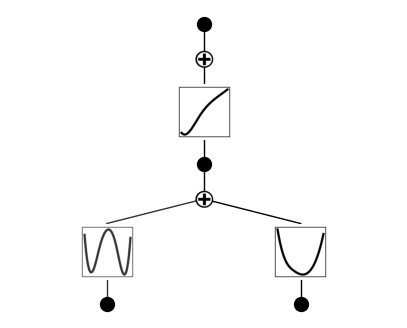

In [15]:
model.plot()

In [16]:
model = model.refine(20)
model.fit(dataset, opt="LBFGS", steps=20);

saving model version 0.2


| train_loss: 1.55e-02 | test_loss: 3.13e-02 | reg: 7.50e+00 | : 100%|█| 20/20 [00:07<00:00,  2.55it

saving model version 0.3


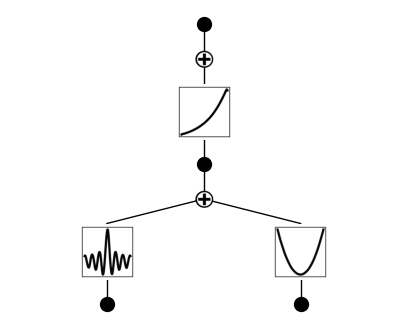

In [17]:
model.plot()

In [18]:
model.suggest_symbolic(0,0,0)

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1        x    0.001579 -0.002265           1                1    0.799547
2      cos    0.162375 -0.255606           2                2    1.548879
3      sin    0.162375 -0.255606           2                2    1.548879
4    1/x^2    0.099639 -0.151408           2                2    1.569718


('0',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  0,
  <function kan.utils.<lambda>(x, y_th)>),
 0.0,
 0)

In [19]:
SYMBOLIC_LIB.keys()

dict_keys(['x', 'x^2', 'x^3', 'x^4', 'x^5', '1/x', '1/x^2', '1/x^3', '1/x^4', '1/x^5', 'sqrt', 'x^0.5', 'x^1.5', '1/sqrt(x)', '1/x^0.5', 'exp', 'log', 'abs', 'sin', 'cos', 'tan', 'tanh', 'sgn', 'arcsin', 'arccos', 'arctan', 'arctanh', '0', 'gaussian'])

In [20]:
add_symbolic('J0', torch.special.bessel_j0, c=1)

In [21]:
model.suggest_symbolic(0,0,0)

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1       J0    0.199265 -0.320585           1                1    0.735883
2        x    0.001579 -0.002265           1                1    0.799547
3      cos    0.162375 -0.255606           2                2    1.548879
4      sin    0.162375 -0.255606           2                2    1.548879


('0',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  0,
  <function kan.utils.<lambda>(x, y_th)>),
 0.0,
 0)

In [22]:
model.suggest_symbolic(0,0,0,a_range=(-40,40))

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0       J0    0.998952 -9.884325           1                1   -1.176865
1        0    0.000000  0.000014           0                0    0.000003
2        x    0.001579 -0.002265           1                1    0.799547
3      cos    0.584037 -1.265438           2                2    1.346912
4      sin    0.584037 -1.265438           2                2    1.346912


('J0',
 (<function torch._C._special.special_bessel_j0>,
  J0,
  1,
  <function torch._C._special.special_bessel_j0>),
 0.9989519119262695,
 1)